In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline
import pandas as pd
import cv2
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from glob import glob

In [2]:
train_dir = '../Dataset/histopathologic-cancer-detection/train' # image folder

In [3]:
data = pd.read_csv('../Dataset/histopathologic-cancer-detection/train_labels.csv')

In [4]:
# quick look at the label stats
data.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
# Define a function to return an image with color channels alligned as RGB (opencv ... path must include ./data/folder/imagename.tif)
def read_img(full_path):
    return cv2.cvtColor(cv2.imread(full_path), cv2.COLOR_BGR2RGB)

C:\Users\jesui\AppData\Local\Temp\ipykernel_24996\1935741709.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  five_negative_file_ids = shuffled_data[shuffled_data['label'] == 0]['id'][:5]
C:\Users\jesui\AppData\Local\Temp\ipykernel_24996\1935741709.py:28: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  five_positive_file_ids = shuffled_data[shuffled_data['label'] == 1]['id'][:5]


166644    e2f4df2155d0ee3da87446dfc73275688df9210a
210521    3a54c527fc19d826fe72d67b19636dfeeb036205
48203     6fee4436267748da12d97ed4a30170fd5911c549
112413    76d558bf696bfeaedadeeca32f9f054dc7286927
120364    57dd164732d6aa109ed9977f3546692472538b06
Name: id, dtype: object
Next
160530    a22a3906eb3414487b204b72bb02fef6cf5042d1
42395     07f0e610ac850c3b165e811c5d8a5897fd2afa0e
71693     2a20cd194ed49097fa0d99eb03ac008f16003417
134712    7651931c27ddf54763443c8c0ba3b33e8724f345
97241     b8264a332ddad7ebbf381a5a90d639a43c39eb3e
Name: id, dtype: object


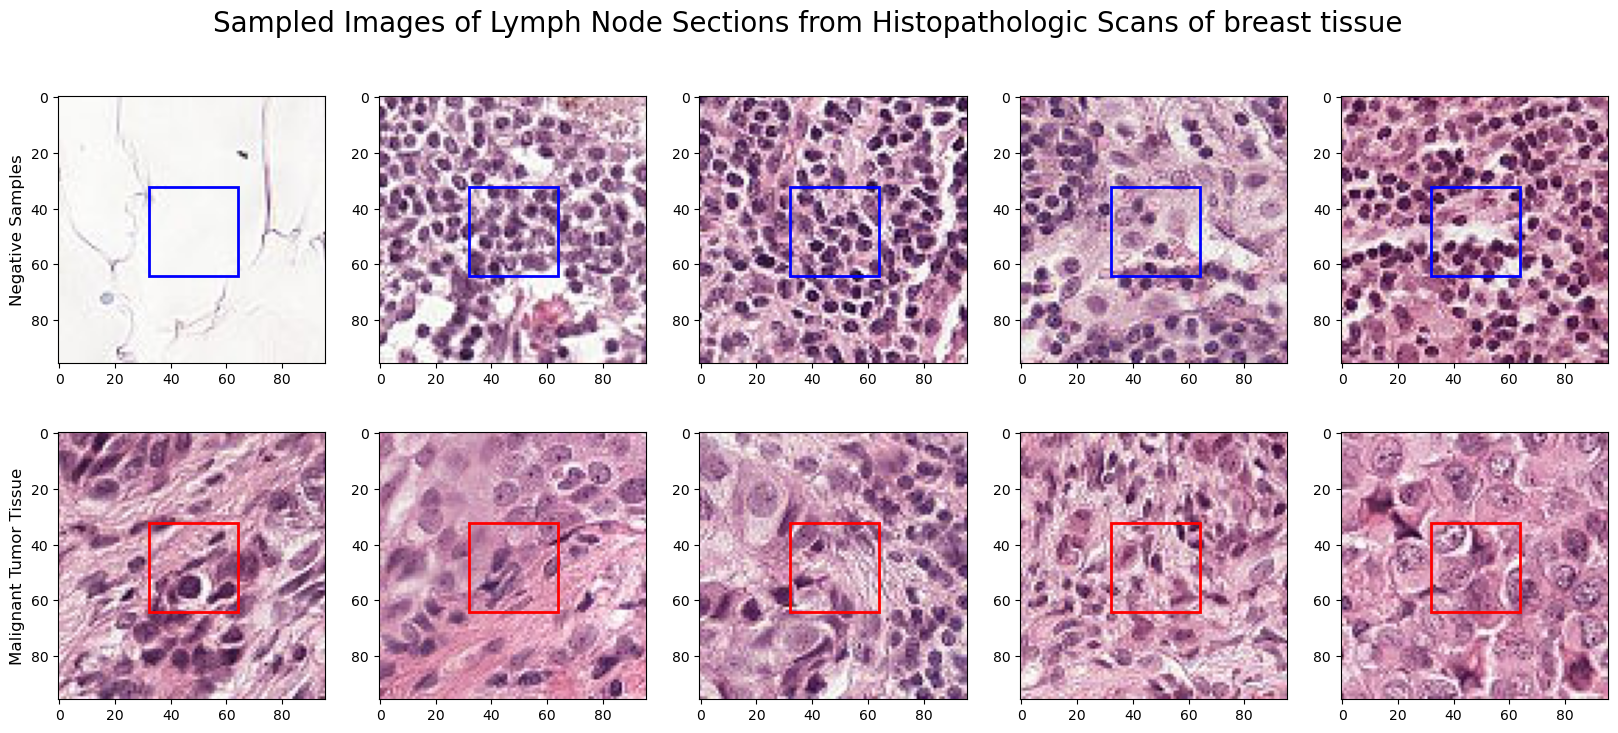

In [11]:
shuffled_data = shuffle(data)

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Sampled Images of Lymph Node Sections from Histopathologic Scans of breast tissue', fontsize=20)

# Find Five Negative Examples
five_negative_file_ids = shuffled_data[shuffled_data['label'] == 0]['id'][:5]
print(five_negative_file_ids)
print("Next")

# Iterate Through The Negative Examples And Plot Them (First Row)
for i, idx in enumerate(five_negative_file_ids):
    path = str(os.path.join(train_dir, idx))+str(".tif")
    ax[0,i].imshow(read_img(path))

     # Create a Rectangle patch (Patch Size is 32 Long By 32 High and Upper Left Corner Starts at x=32, y=32)
    box = patches.Rectangle((32,32), 32, 32,
                            linewidth=2,
                            edgecolor='b',
                            facecolor='none', 
#                             linestyle='--', 
                            capstyle='round')

    ax[0,i].add_patch(box)
    ax[0,0].set_ylabel('Negative Samples', size='large')

# Find Five Positive Examples
five_positive_file_ids = shuffled_data[shuffled_data['label'] == 1]['id'][:5]
print(five_positive_file_ids)

# Iterate Through The Negative Examples And Plot Them (First Row)    for i, idx in enumerate(five_positive_file_ids):
for i, idx in enumerate(five_positive_file_ids):
    path = str(os.path.join(train_dir, idx))+str(".tif")
    ax[1,i].imshow(read_img(path))

     # Create a Rectangle patch (Patch Size is 32 Long By 32 High and Upper Left Corner Starts at x=32, y=32)
    box = patches.Rectangle((32,32), 32, 32,
                            linewidth=2,
                            edgecolor='r',
                            facecolor='none', 
#                             linestyle='--', 
                            capstyle='round')

    ax[1,i].add_patch(box)
    ax[1,0].set_ylabel('Malignant Tumor Tissue', size='large')